<a href="https://colab.research.google.com/github/pi-mishra/BCG-Data-science-and-analytics-internship/blob/main/BCG_FeatureEngineering_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages


import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BCG_data/clean_data_after_eda.csv')

In [8]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,avg_variable_price,avg_fixed_price,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.097356,26.065205,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.052244,14.770458,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.086311,14.795150,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.050403,14.800088,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.100226,27.125437,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'avg_variable_price', 'avg_fixed_price', 'churn'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'avg_variable_price', 'avg_fixed_price', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

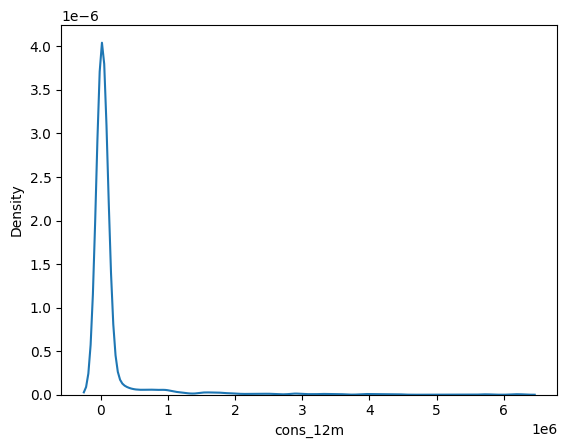

<Figure size 1000x600 with 0 Axes>

Skewness cons_12m : 5.997308122068939


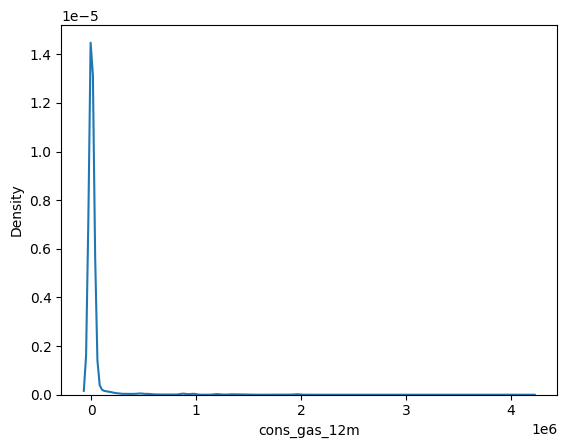

<Figure size 1000x600 with 0 Axes>

Skewness cons_gas_12m : 9.59752998980867


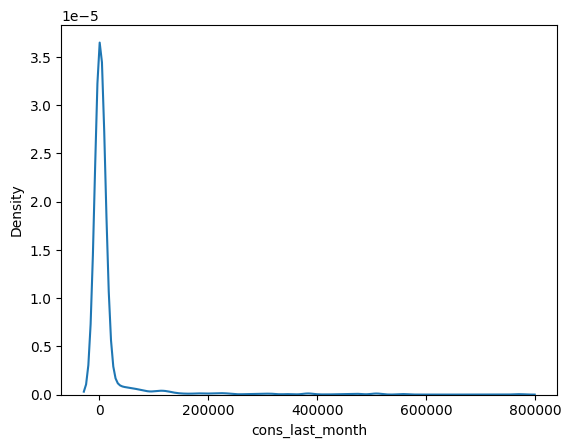

<Figure size 1000x600 with 0 Axes>

Skewness cons_last_month : 6.391406974903164


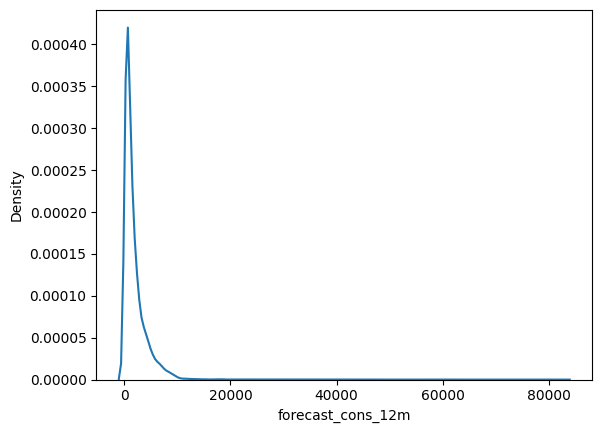

<Figure size 1000x600 with 0 Axes>

Skewness forecast_cons_12m : 7.155852615615487


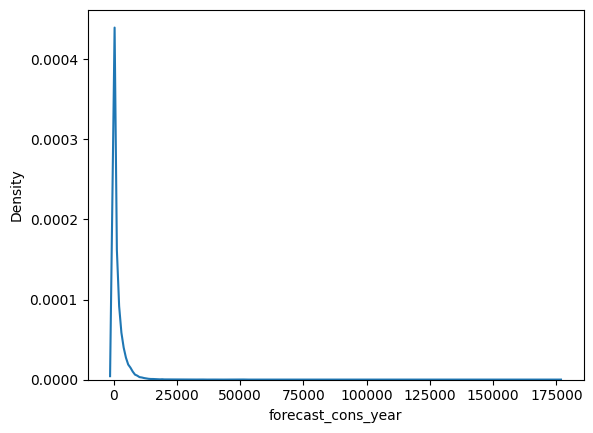

<Figure size 1000x600 with 0 Axes>

Skewness forecast_cons_year : 16.587989682280156


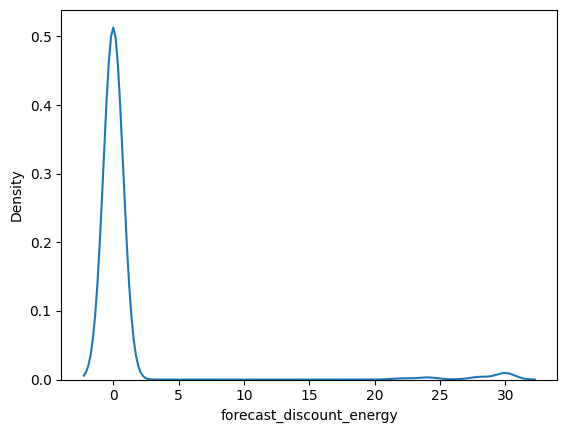

<Figure size 1000x600 with 0 Axes>

Skewness forecast_discount_energy : 5.155098289065647


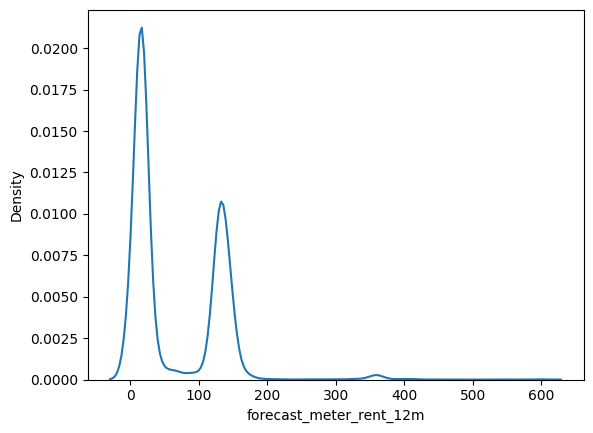

<Figure size 1000x600 with 0 Axes>

Skewness forecast_meter_rent_12m : 1.5051478520584571


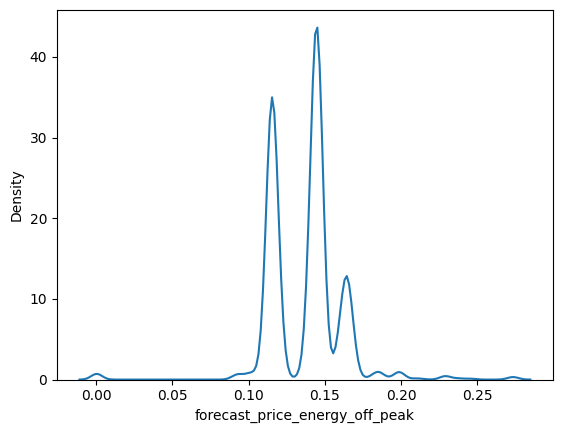

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_energy_off_peak : -0.11958602474988272


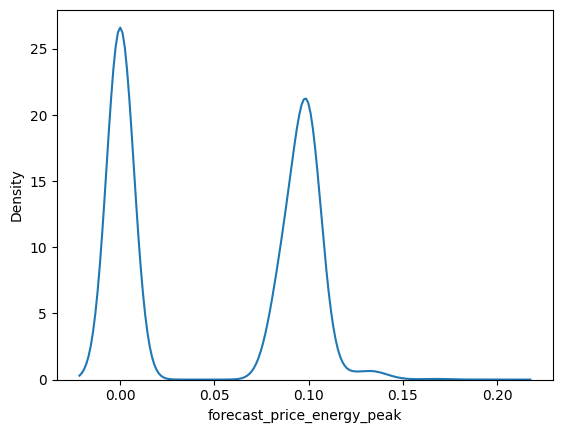

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_energy_peak : -0.014331427861824115


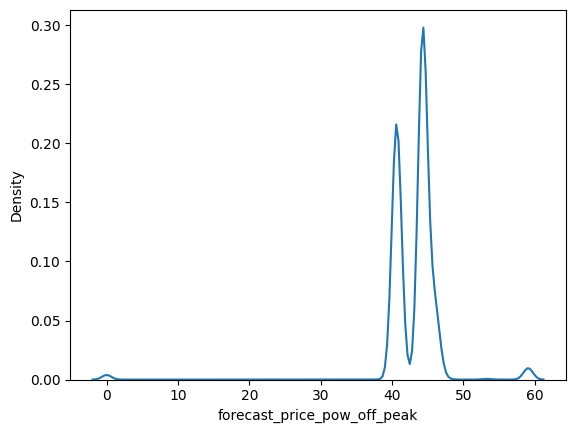

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_pow_off_peak : -4.998771993850156


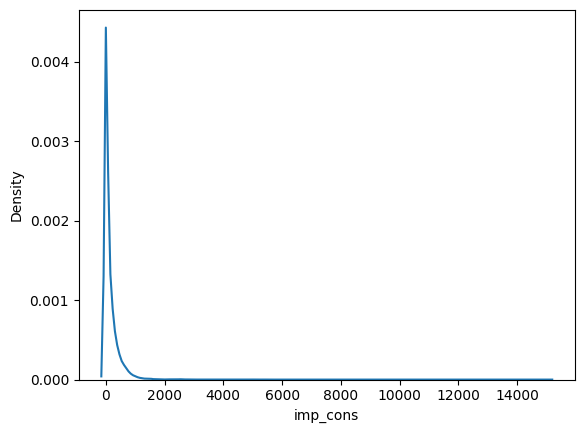

<Figure size 1000x600 with 0 Axes>

Skewness imp_cons : 13.19879897169991


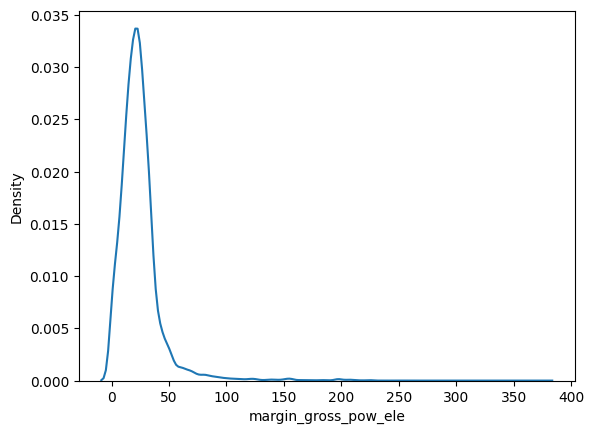

<Figure size 1000x600 with 0 Axes>

Skewness margin_gross_pow_ele : 4.472632134993316


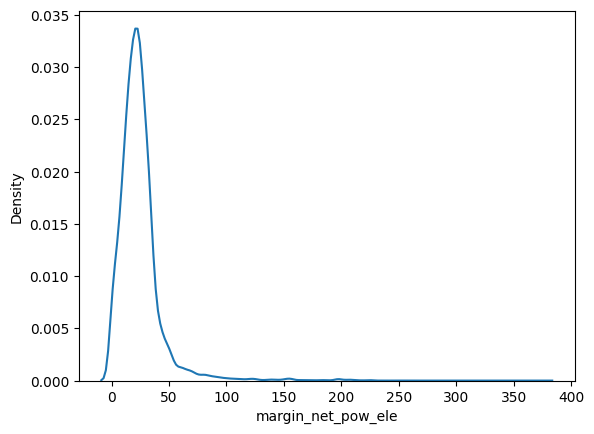

<Figure size 1000x600 with 0 Axes>

Skewness margin_net_pow_ele : 4.473325821517542


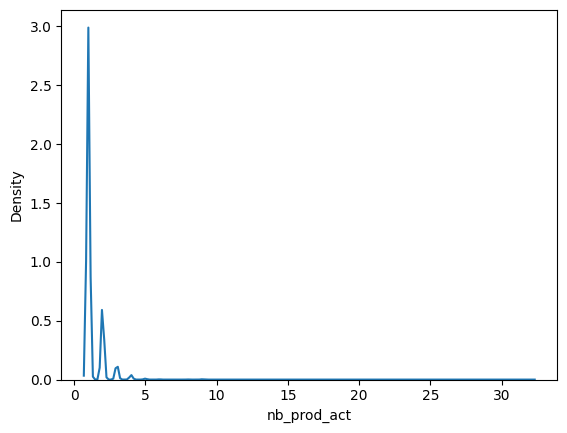

<Figure size 1000x600 with 0 Axes>

Skewness nb_prod_act : 8.636877937187974


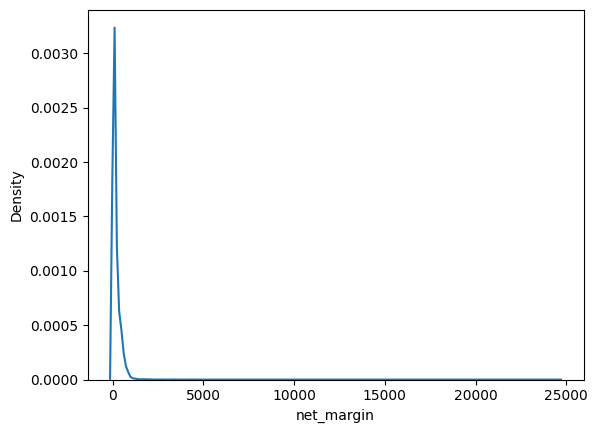

<Figure size 1000x600 with 0 Axes>

Skewness net_margin : 36.56951466408974


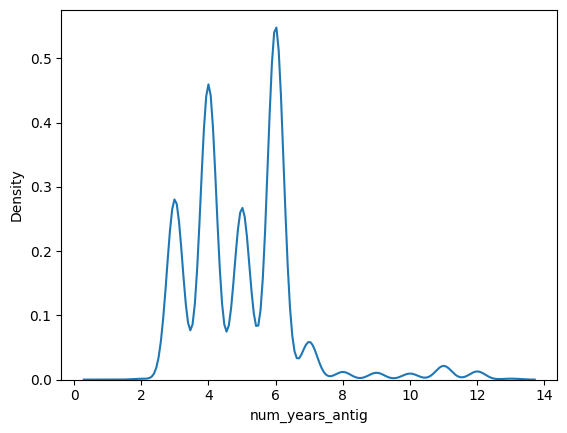

<Figure size 1000x600 with 0 Axes>

Skewness num_years_antig : 1.4462138232506747


In [14]:
#outlier treatment

density_col = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
      'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
      'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 
      'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig']

for i in density_col:
  sns.kdeplot(df[i])
  plt.figure(figsize=(10, 6))
  plt.show()
  skewness = df[i].skew()
  print('Skewness',i,':', skewness)